<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/redesneuronalesIntro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
#celsius=np.array([-40.,-10,0,8,15,22,38,10,20,30,40])
#fahrenheit=np.array([-40,14,32,46,59,72,100,50,68,86,104])

kelvin=np.array([1, 10,90,20,35,81,40,12.5])
rankine=np.array([1.8,18,162,36,63,145.8,72,22.5])

In [ ]:
capa=tf.keras.layers.Dense(units=1,input_shape=[1]) #una entrada con una neurona
modelo=tf.keras.Sequential([capa]) #modelo secuencial

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #como ajustar los pesos y el sesgo
    loss='mean_squared_error' #funcion de perdida
)

In [ ]:
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
print('inciando entrenamiento...')
#historial=modelo.fit(celsius,fahrenheit,epochs=1000,verbose=False)
historial=modelo.fit(kelvin,rankine,epochs=1000,verbose=False)
print('entrenamiento finalizado! ')

inciando entrenamiento...
entrenamiento finalizado! 


In [ ]:
# Guarde el modelo entrenado como archivo hdf5
# Guarde el diagrama del modelo y los pesos al mismo tiempo.
modelo.save('modelo_entrenado.h5')  

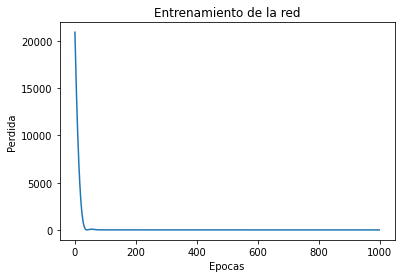

In [ ]:
import matplotlib.pyplot as plt

plt.plot(historial.history['loss'])
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.title('Entrenamiento de la red')
plt.show()

In [ ]:
print('Haciendo la prediccion')
resultado=modelo.predict([100,200])
print(resultado) #valor correcto 212,392 #valor correcto 180,360

Haciendo la prediccion
[[179.89865]
 [359.63232]]


In [ ]:
print('variables internas del modelo')
print(capa.get_weights()) #muestra los pesos y el sesgo

variables internas del modelo
[array([[1.7973367]], dtype=float32), array([0.16498539], dtype=float32)]


In [ ]:
print('Haciendo la prediccion')
resultado=modelo.predict([100,200])
print(resultado) #valor correcto 212,392

Haciendo la prediccion
[[179.89865]
 [359.63232]]


In [ ]:
from keras.models import load_model
  
# Recargar el modelo
modelo2 = load_model('modelo_entrenado.h5')

In [ ]:
print('Haciendo la prediccion')
resultado=modelo2.predict([100,200])
print(resultado) #valor correcto 212,392

Haciendo la prediccion
[[212.12158]
 [392.51337]]


In [ ]:
oculta1=tf.keras.layers.Dense(units=3,input_shape=[1])
oculta2=tf.keras.layers.Dense(units=3)
salida=tf.keras.layers.Dense(units=1)
modelo=tf.keras.Sequential([oculta1,oculta2,salida])

In [ ]:
print('variables internas del modelo')
print(oculta1.get_weights()) #muestra los pesos y el sesgo
print(oculta2.get_weights()) #muestra los pesos y el sesgo
print(salida.get_weights()) #muestra los pesos y el sesgo

variables internas del modelo
[array([[ 0.51472235, -0.62056124,  0.21176958]], dtype=float32), array([ 3.6830595, -3.692125 , -3.6924775], dtype=float32)]
[array([[-0.52738583, -0.9705716 ,  0.7376793 ],
       [-0.77733517,  0.9197766 , -0.90468776],
       [-0.4664541 ,  1.2039813 , -0.22070648]], dtype=float32), array([ 3.2871253, -3.7499506,  3.678018 ], dtype=float32)]
[array([[ 0.28206336],
       [-1.0549899 ],
       [ 1.0143915 ]], dtype=float32), array([3.597682], dtype=float32)]


Model structure

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


None

fited parameters
[array([[1.801989]], dtype=float32), array([31.824581], dtype=float32)]

Train: 0.059, Test: 0.016

Predicted vs Real values
[[212.02348]
 [302.12292]
 [357.0836 ]] [212.  302.  356.9]


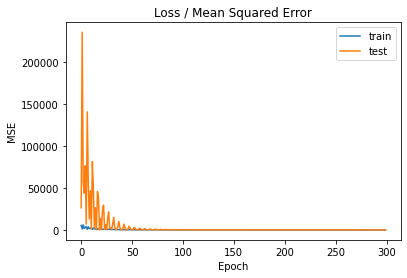

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt


#training data
trainX=np.array([-40.,-10,0,8,15,22,38,10,20,30,40])
trainy=np.array([-40,14,32,46,59,72,100,50,68,86,104])

testX=np.array([100,150,180.5])
testy=np.array([212,302,356.9])

# define model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), 
                    epochs=300, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)

print('Model structure\n')
print(model.summary())

print('\nfited parameters')
print(model.get_weights()) #weights and bias

print('\nTrain: %.3f, Test: %.3f' % (train_mse, test_mse))

pred = model.predict(testX, verbose=0)
print('\nPredicted vs Real values')
print(pred,testy)

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

Train: 1.000, Test: 1.000
Model structure

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 2)                 6         
                                                                 
 dense_34 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None

fited parameters
dense_33
[array([[-1.6577477 , -0.29805866],
       [-0.4329697 ,  4.3671527 ]], dtype=float32), array([ 0.      , -1.194127], dtype=float32)]
dense_34
[array([[-1.0927908],
       [ 4.5178294]], dtype=float32), array([-3.5304255], dtype=float32)]

Predicted vs Real values
[[0.9888132 ]
 [0.02845882]
 [0.02845882]
 [0.9979451 ]] 0    1
1    0
2    0
3    1
Name: y, dtype: int64


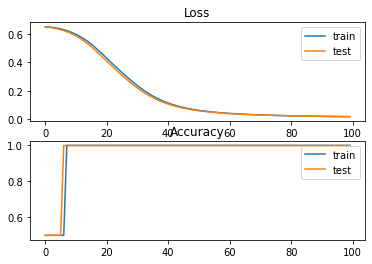

In [24]:
# mlp for the circles problem with cross entropy loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import pandas as pd
# generate 2d classification dataset
#X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
df = pd.DataFrame({
    "x0": [0.3, 0.1, 0.4, 0.5],
    "x1": [0.7, 0.2, 0.3, 0.8],
    "y": [1, 0, 0, 1]
})

y = df.pop("y")
X = df

# split into train and test
n_train = 4
trainX, testX = X, X
trainy, testy = y,y
# define model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, 
                    validation_data=(testX, testy), 
                    epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

print('Model structure\n')
print(model.summary())

print('\nfited parameters')
#print(model.get_weights()) #weights and bias
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())

pred = model.predict(testX, verbose=0)
print('\nPredicted vs Real values')
print(pred,testy)

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.828, Test: 0.824


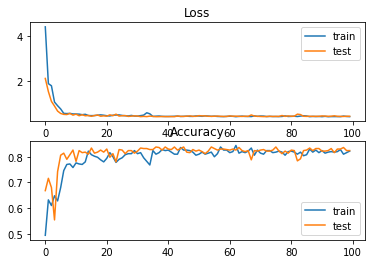

In [26]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [4]:
# first neural network with keras make predictions
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                108       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
24/24 [==============================] - 0s 1ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected